# 1. importation de libreries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
#chargement des données 
data = pd.read_csv('Data/USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
x = data['Avg. Area Income'].values
y = data['Price'].values

In [13]:
x

array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367], shape=(5000,))

In [14]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

# separation des données train and test

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y, 
                                                 test_size=0.25,
                                                 random_state=40)

In [16]:
x_train = x_train.reshape(3750, 1)
x_test = x_test.reshape(1250, 1)

In [17]:
print("x-train Shape :",x_train.shape)
print("x-test Shape :",x_test.shape)
print("y-train Shape :",y_train.shape)
print("y-test Shape :",y_test.shape)

x-train Shape : (3750, 1)
x-test Shape : (1250, 1)
y-train Shape : (3750,)
y-test Shape : (1250,)


# construie modele

In [18]:
#importer l'algorithmes de la regression lineaire 
from sklearn.linear_model import LinearRegression

In [44]:
modele_lineaire= LinearRegression()
modele_lineaire.fit(x_train,y_train)

LinearRegression()

In [55]:
predictions=modele_lineaire.predict(x_test)
resultats=pd.DataFrame({'prix reels':y_test, 'prix predits':predictions})

In [56]:
predictions

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

# faire la prediction

In [46]:
predictions= modele_lineaire.predict(x_test)

In [47]:
predictions

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

In [48]:
y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ],
      shape=(1250,))

In [49]:
resultats= pd.DataFrame({'y-score-reel':y_test,'y-score-predits':y_scores_predits})
resultats

,y-score-reel,y-score-predits
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
print("MISE de la regression lineaire :", mean_squared_error(y_test,y_scores_predits))
print("r2 score de la regression lineaire :",r2_score(y_test,y_scores_predits))

MISE de la regression lineaire : 70345556190.3212
r2 score de la regression lineaire : 0.43322233931263276


In [52]:
import matplotlib.pyplot as plt

# visualisation, du resultat

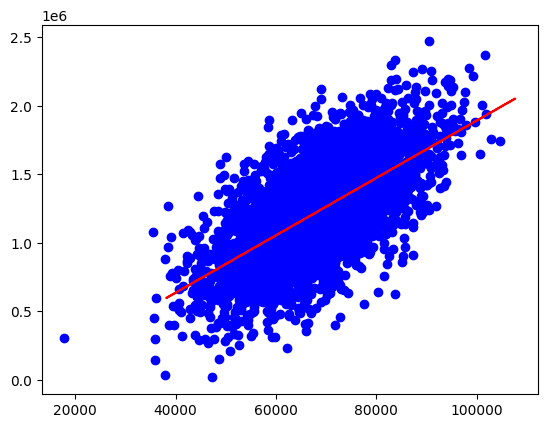

In [53]:
plt.scatter(x_train,y_train,color='blue', label='train data')
plt.plot(x_test,y_scores_predits,color='red',label='ligne e la regression')

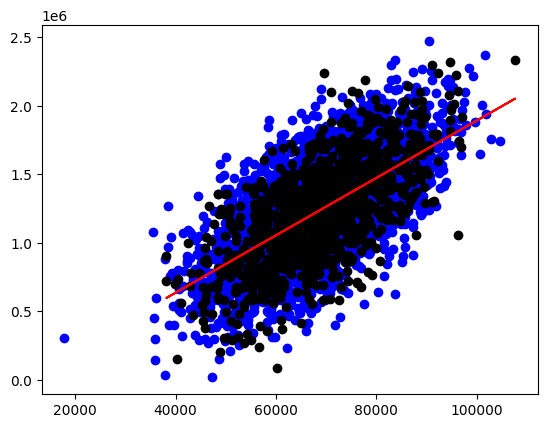

In [54]:
plt.scatter(x_train,y_train, color='blue', label='train_data')
plt.scatter(x_test,y_test, color='black', label='test_data')
plt.plot(x_test, y_scores_predits, color='red', label='ligne de la regression')
#plt.plot(x_test, modele_lineaire.predicts(x_train), color='red', label='ligne de la regression')
plt.show()

# prediction simple

In [42]:
differences=y_test-predictions
diff=pd.DataFrame({'y-test':y_test,'y-prix-predits':predictions,'differences':differences})
diff

,y-test,y-prix-predits,differences
0,1.435770e+06,1.375828e+06,59942.165818
1,1.668448e+06,1.594792e+06,73655.637228
2,1.762215e+06,1.378886e+06,383328.555685
3,1.106261e+06,1.121330e+06,-15068.763964
4,1.051124e+06,1.001248e+06,49875.895328
...,...,...,...
1245,7.054441e+05,9.409852e+05,-235541.106927
1246,1.358647e+06,1.629427e+06,-270780.446581
1247,9.750058e+05,1.092890e+06,-117884.027067
1248,1.393996e+06,1.437100e+06,-43104.161504


In [43]:
print(modele_lineaire.predict([[600]]))

[-189757.30814435]
